#### The main focus here is to discover the main factors of a high grossing movie
#### Initial guess: Picture(which can be affected by budget), actors(popularity 'also effected by budget'), and director(popularity). 

In [2]:
reset -fs

In [64]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', 50)

In [65]:
movies = pd.read_csv('https://raw.githubusercontent.com/sundeepblue/movie_rating_prediction/master/movie_metadata.csv')
movies.columns = [column.lower() for column in movies.columns]
movies.head(2)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0


In [57]:
col= movies.columns.tolist()
newcol=[]
removeset = ('color','actor_1_facebook_likes',
           'actor_2_facebook_likes',
           'actor_3_facebook_likes',
           'actor_1_facebook_likes',
          'director_facebook_likes',
          'cast_total_facebook_likes',
          'movie_imdb_link',
          'aspect_ratio',
          'movie_facebook_likes')
for item in col:
    if item not in removeset:
        newcol.append(item)
    
print(newcol)

['director_name', 'num_critic_for_reviews', 'duration', 'actor_2_name', 'gross', 'genres', 'actor_1_name', 'movie_title', 'num_voted_users', 'actor_3_name', 'facenumber_in_poster', 'plot_keywords', 'num_user_for_reviews', 'language', 'country', 'content_rating', 'budget', 'title_year', 'imdb_score']


In [67]:
movies = movies.fillna(movies.median()).drop_duplicates(['movie_title','title_year'])
movies_usa = movies[movies.country == 'USA'][movies.imdb_score >6.0][movies.title_year>1990]
movies_usa.head(2)

/Users/DL/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0


In [70]:
movies_usa=movies_usa.sort_values(by=['gross'], ascending=False)[newcol]
movies_usa.head()

,director_name,num_critic_for_reviews,duration,actor_2_name,gross,genres,actor_1_name,movie_title,num_voted_users,actor_3_name,facenumber_in_poster,plot_keywords,num_user_for_reviews,language,country,content_rating,budget,title_year,imdb_score
0,James Cameron,723.0,178.0,Joel David Moore,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,Wes Studi,0.0,avatar|future|marine|native|paraplegic,3054.0,English,USA,PG-13,237000000.0,2009.0,7.9
26,James Cameron,315.0,194.0,Kate Winslet,658672302.0,Drama|Romance,Leonardo DiCaprio,Titanic,793059,Gloria Stuart,0.0,artist|love|ship|titanic|wet,2528.0,English,USA,PG-13,200000000.0,1997.0,7.7
29,Colin Trevorrow,644.0,124.0,Judy Greer,652177271.0,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,Omar Sy,0.0,dinosaur|disaster film|experiment gone wrong|j...,1290.0,English,USA,PG-13,150000000.0,2015.0,7.0
17,Joss Whedon,703.0,173.0,Robert Downey Jr.,623279547.0,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,Scarlett Johansson,3.0,alien invasion|assassin|battle|iron man|soldier,1722.0,English,USA,PG-13,220000000.0,2012.0,8.1
66,Christopher Nolan,645.0,152.0,Heath Ledger,533316061.0,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,Morgan Freeman,0.0,based on comic book|dc comics|psychopath|star ...,4667.0,English,USA,PG-13,185000000.0,2008.0,9.0


In [118]:
movies_usa.describe()

,num_critic_for_reviews,duration,gross,num_voted_users,facenumber_in_poster,num_user_for_reviews,budget,title_year,imdb_score,loggross
count,2083.000000,2083.000000,2.083000e+03,2.083000e+03,2083.000000,2083.000000,2.083000e+03,2083.000000,2083.000000,2083.000000
mean,175.677388,109.049448,5.939462e+07,1.241699e+05,1.375900,357.213154,4.010071e+07,2005.503120,6.950216,16.825783
std,137.669007,25.411785,7.776961e+07,1.741741e+05,2.157874,459.499572,4.591060e+07,6.321621,0.605501,2.069629
min,1.000000,11.000000,1.111000e+03,5.000000e+00,0.000000,1.000000,2.180000e+02,1991.000000,6.100000,7.013016
25%,75.000000,95.000000,1.126567e+07,1.862700e+04,0.000000,102.000000,1.000000e+07,2001.000000,6.500000,16.237256
50%,146.000000,107.000000,3.065982e+07,6.354800e+04,1.000000,215.000000,2.200000e+07,2006.000000,6.900000,17.238463
75%,240.500000,121.000000,7.571177e+07,1.619475e+05,2.000000,436.500000,5.200000e+07,2011.000000,7.300000,18.142444
max,813.000000,330.000000,7.605058e+08,1.689764e+06,43.000000,4667.000000,3.000000e+08,2016.000000,9.300000,20.449494


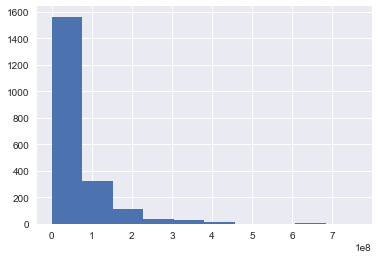

In [119]:
movies_usa['gross'].hist();

In [72]:
grossing = movies_usa['gross']

movies_usa['loggross']=np.log(grossing)

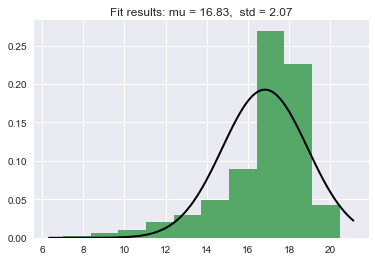

In [76]:
x=movies_usa['loggross']
μ, σ = norm.fit(x)
plt.hist(x,range=[min(x),max(x)], normed=True)
plt.hist(movies_usa['loggross'], normed=True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, μ, σ)
plt.plot(x, p, 'k', linewidth=2);
title = "Fit results: mu = {:.2f},  std = {:.2f}".format(μ, σ)
plt.title(title);

In [104]:
movies_rate=movies_usa[movies_usa.content_rating.isin(['R','PG-13'])]
movies_rate.content_rating.value_counts()

R        945
PG-13    669
Name: content_rating, dtype: int64

In [115]:
smf.ols(formula="loggross ~ content_rating+budget+imdb_score", data=movies_rate).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               loggross   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     236.2
Date:                Wed, 08 Mar 2017   Prob (F-statistic):          5.58e-127
Time:                        15:36:11   Log-Likelihood:                -3110.1
No. Observations:                1614   AIC:                             6228.
Df Residuals:                    1610   BIC:                             6250.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Intercept              13.3673      0.489     27.347      0.000        12.409    14.326
content_rating[T.R]    -0.5012      0.090     -5.548      0.000        -0.678    -0.324
budget               2.163e-08   1.01e-09     21.485      0.000      1.97e-08  2.36e-08
imdb_score              0.4195      0.071      5.913      0.000         0.280     0.559
==============================================================================
Omnibus:                      512.677   Durbin-Watson:                   0.378
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1531.414
Skew:                          -1.620   Prob(JB):                         0.00
Kurtosis:                       6.503   Cond. No.                     7.02e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.02e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

__$H_0$:  The gross income of movies will not be affected by year__

__$H_a$:  The gross income of movies will be affected by year__

In [111]:
movie_year=movies_rate[movies_rate.title_year > 2010]
movie_year.describe()

,num_critic_for_reviews,duration,gross,num_voted_users,facenumber_in_poster,num_user_for_reviews,budget,title_year,imdb_score,loggross
count,421.000000,421.000000,4.210000e+02,4.210000e+02,421.000000,421.000000,4.210000e+02,421.000000,421.000000,421.000000
mean,302.724466,114.712589,7.195692e+07,1.559756e+05,1.707838,361.938242,4.886935e+07,2013.137767,6.912589,17.203247
std,168.948245,20.997405,9.086541e+07,1.682143e+05,2.601769,397.801088,5.724767e+07,1.529091,0.585343,1.815004
min,1.000000,75.000000,3.330000e+03,6.000000e+00,0.000000,1.000000,4.200000e+04,2011.000000,6.100000,8.110728
25%,178.000000,100.000000,1.773857e+07,4.128800e+04,0.000000,118.000000,1.200000e+07,2012.000000,6.500000,16.691252
50%,285.000000,111.000000,4.100853e+07,1.012870e+05,1.000000,242.000000,2.800000e+07,2013.000000,6.800000,17.529291
75%,415.000000,126.000000,8.689718e+07,2.122040e+05,2.000000,461.000000,6.000000e+07,2014.000000,7.300000,18.280236
max,813.000000,240.000000,6.521773e+08,1.144337e+06,31.000000,3018.000000,2.637000e+08,2016.000000,8.600000,20.295827


In [113]:
movie_year.title_year=movie_year.title_year.astype(str)

/Users/DL/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [117]:
smf.ols(formula="loggross ~ title_year", data=movie_year).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               loggross   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.018
Date:                Wed, 08 Mar 2017   Prob (F-statistic):              0.406
Time:                        15:38:50   Log-Likelihood:                -845.26
No. Observations:                 421   AIC:                             1703.
Df Residuals:                     415   BIC:                             1727.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept               16.9450      0.205     82.463      0.000        16.541    17.349
title_year[T.2012.0]     0.2112      0.290      0.729      0.466        -0.358     0.781
title_year[T.2013.0]     0.3634      0.279      1.301      0.194        -0.186     0.912
title_year[T.2014.0]     0.2095      0.286      0.732      0.464        -0.353     0.772
title_year[T.2015.0]     0.2618      0.316      0.828      0.408        -0.360     0.883
title_year[T.2016.0]     0.8221      0.381      2.158      0.032         0.073     1.571
==============================================================================
Omnibus:                      167.102   Durbin-Watson:                   0.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              632.564
Skew:                          -1.781   Prob(JB):                    4.37e-138
Kurtosis:                       7.835   Cond. No.                         6.69
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [100]:
"""x = movies_usa['imdb_score']
y = movies_usa['loggross']
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,5))

ax1.scatter(x,y,alpha=0.5)
ax1.set_title('IMDB VS loggross',fontsize=16)
ax1.set_xlabel('imdb_score',fontsize=16)
ax1.set_ylabel('loggross',fontsize=16)
hxb=ax2.hexbin(x,y,alpha=0.5,cmap='inferno',bins='log',gridsize=30)
ax2.set_title('IMDB VS loggross',fontsize=16)
ax2.set_xlabel('imdb_score',fontsize=16)
ax2.set_ylabel('loggross',fontsize=16)
cb = f.colorbar(hxb, ax=ax2)
cb.set_label('Density',fontsize=14)"""

"x = movies_usa['imdb_score']\ny = movies_usa['loggross']\nf, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,5))\n\nax1.scatter(x,y,alpha=0.5)\nax1.set_title('IMDB VS loggross',fontsize=16)\nax1.set_xlabel('imdb_score',fontsize=16)\nax1.set_ylabel('loggross',fontsize=16)\nhxb=ax2.hexbin(x,y,alpha=0.5,cmap='inferno',bins='log',gridsize=30)\nax2.set_title('IMDB VS loggross',fontsize=16)\nax2.set_xlabel('imdb_score',fontsize=16)\nax2.set_ylabel('loggross',fontsize=16)\ncb = f.colorbar(hxb, ax=ax2)\ncb.set_label('Density',fontsize=14)"

In [101]:
"""g_score_model = ols("loggross ~ imdb_score", data=movies_usa).fit()
g_score_model.summary()"""

'g_score_model = ols("loggross ~ imdb_score", data=movies_usa).fit()\ng_score_model.summary()'

In [102]:
"""x = movies_usa['budget']
y = movies_usa['loggross']
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,5))

ax1.scatter(x,y,alpha=0.5)
ax1.set_title('Budget VS logGross',fontsize=16)
ax1.set_xlabel('budget',fontsize=16)
ax1.set_ylabel('loggross',fontsize=16)
hxb=ax2.hexbin(x,y,alpha=0.5,cmap='inferno',bins='log',gridsize=30)
ax2.set_title('Budget VS logGross',fontsize=16)
ax2.set_xlabel('budget',fontsize=16)
ax2.set_ylabel('loggross',fontsize=16)
cb = f.colorbar(hxb, ax=ax2)
cb.set_label('Density',fontsize=14)"""

"x = movies_usa['budget']\ny = movies_usa['loggross']\nf, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,5))\n\nax1.scatter(x,y,alpha=0.5)\nax1.set_title('Budget VS logGross',fontsize=16)\nax1.set_xlabel('budget',fontsize=16)\nax1.set_ylabel('loggross',fontsize=16)\nhxb=ax2.hexbin(x,y,alpha=0.5,cmap='inferno',bins='log',gridsize=30)\nax2.set_title('Budget VS logGross',fontsize=16)\nax2.set_xlabel('budget',fontsize=16)\nax2.set_ylabel('loggross',fontsize=16)\ncb = f.colorbar(hxb, ax=ax2)\ncb.set_label('Density',fontsize=14)"

In [103]:
"""g_b_model = ols("loggross ~ budget", data=movies_usa).fit()
g_b_model.summary()"""

'g_b_model = ols("loggross ~ budget", data=movies_usa).fit()\ng_b_model.summary()'

In [106]:
"""movies_usa['content_rating'].value_counts().plot(kind = 'bar');"""

"movies_usa['content_rating'].value_counts().plot(kind = 'bar');"

In [116]:
"""rate_g = smf.ols(formula="loggross ~ content_rating", data=movies_rate).fit()
rate_g.summary()"""

'rate_g = smf.ols(formula="loggross ~ content_rating", data=movies_rate).fit()\nrate_g.summary()'

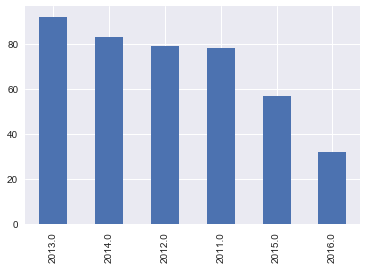

In [112]:
#movie_year.title_year.value_counts().plot(kind = 'bar');